In [17]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [309]:
def make_system(twg, twc, tco):
    """
    A function that returns a system object with a state called init
    The current system
    
    twg = Hot gas side local wall temperature
    twc = Coolant side local wall temperature
    tco = Temperature of Coolant Liquid (water)
    taw = Temperature of the hot combustion gases (K)
    hg = hot gas side heat transfer co-effficient = 2956
    k = thermal conductivity of Al 6061, W/(m*K)
    thickness = thickness of Al 6061 wall (m)
    hc = coolant side heat transfer co-efficient
    t_0 = intitial time 
    t_end = final time
    
    """
    system = System(init = State(twg = twg, twc = twc, tco = tco),
                    taw = 3000,
                    hg = 2187,
                    k = 167 ,
                    thickness = .00238125,
                    hc = 32369,
                    q =  4905759, 
                    t_0 = 0,
                    t_end = 1000)
    return system

In [310]:
def update_func(state,t,system):
    """Test update"""

    unpack(system)
    twg1, twc1, tco1 = state
    
    dtwg = hg*(taw - twg1)
    #print(twg1)
    dtwc = (k/thickness)*(twg1 - twc1)
    dtco = hc*(twc1 - tco1)
    
    # Implement cooling equations. Cooling 
    
    twg1 += dtwg * 0.00001
    twc1 += (dtwc - dtco) * 0.00001
    tco1 += dtco * 0.00001
    
    return State(twg = twg1, twc = twc1, tco = tco1)

In [311]:
update_func(system.init, 1, system)

,values
twg,652.488000
twc,415.786934
tco,64.738000


In [312]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    frame.index / 100
    return frame

In [313]:
def plot_results(twg,twc):

    plot(twg, '--', label='twg')
    plot(twc, '-', label='twc')
    decorate(xlabel='Time',
             ylabel='Temperature')

In [315]:
system = make_system(600, 200, 0)

,values
init,twg 600 twc 200 tco 0 dtype: int64
taw,3000
hg,2187
k,167
thickness,0.00238125
hc,32369
q,4905759
t_0,0
t_end,1000


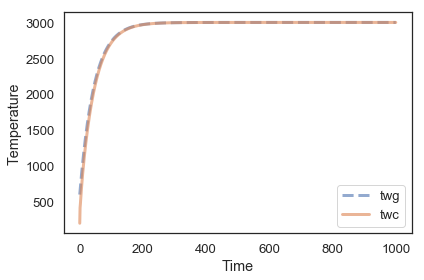

In [316]:
results = run_simulation(system, update_func)
plot_results(results.twg,results.twc)
